# * Kurapati Venkatesh

# * 09012021

# * Topic: Forecasting – Ensemble Techniques  ✨🎄

# ---------------------------------------------------------------------------

## Problem Statement:

## Most cancers form a lump called as tumour or a growth. But not all lumps are cancer. Doctors take out a piece of the lump and look at it to find out if it’s cancer. Lumps that are not cancer are called benign (be-NINE). Lumps that are cancer are called malignant (muh-LIG-nunt). There are some cancers, like leukemia (cancer of the blood), that don’t form tumour. They grow in the blood cells or other cells of the body. For instance, If a doctor tends to wrongly diagnose a benine tumour as a malignant tumour  can a cause a overwhelming anxiety in patient which can lead to depression or much worse, a wrong diagnosis is a major problem in our health care sector, to improve their analysis build an ensemble model on the dataset which can accurately classify benine and Malignant tumours on the dataset given. Perform Bagging, Boosting, Stacking, Voting algorithm and provide your insights in the documentation.  

## -----------------------------------------------------------------------------------

### Problem Objective:
##### To predict whether the tumor is benign or Malignant - To build an ensemble model to correctly classify the outcome variable and improve your model prediction by using GridSearchCV. we  must apply Bagging, Boosting, Stacking and Voting on the dataset.

## -------------------------------------------------------------------------------------------

## import dataset:

In [2]:
import pandas as pd
df = pd.read_csv(r"G:\360digit\assignments meterial\ensamble techniques\Tumor_Ensemble.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [6]:
del df['id']

In [9]:
df = pd.get_dummies(df, columns = ["diagnosis"], drop_first = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   radius_mean        569 non-null    float64
 1   texture_mean       569 non-null    float64
 2   perimeter_mean     569 non-null    float64
 3   area_mean          569 non-null    float64
 4   smoothness_mean    569 non-null    float64
 5   compactness_mean   569 non-null    float64
 6   concavity_mean     569 non-null    float64
 7   points_mean        569 non-null    float64
 8   symmetry_mean      569 non-null    float64
 9   dimension_mean     569 non-null    float64
 10  radius_se          569 non-null    float64
 11  texture_se         569 non-null    float64
 12  perimeter_se       569 non-null    float64
 13  area_se            569 non-null    float64
 14  smoothness_se      569 non-null    float64
 15  compactness_se     569 non-null    float64
 16  concavity_se       569 non

In [12]:
# Input and Output Split
predictors = df.loc[:, df.columns!="diagnosis_M"]
type(predictors)

pandas.core.frame.DataFrame

In [13]:
target = df["diagnosis_M"]
type(target)

pandas.core.series.Series

In [14]:
# Train Test partition of the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state=0)

## Random Forest Model:

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=1, random_state=42)

In [17]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=1, random_state=42)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [19]:
confusion_matrix(y_test, rf_clf.predict(x_test))
accuracy_score(y_test, rf_clf.predict(x_test))

0.9649122807017544

## GridSearchCV

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
rf_clf_grid = RandomForestClassifier(n_estimators=500, n_jobs=1, random_state=42)

In [22]:
param_grid = {"max_features": [4, 5, 6, 7, 8, 9, 10], "min_samples_split": [2, 3, 10]}

In [23]:
grid_search = GridSearchCV(rf_clf_grid, param_grid, n_jobs = -1, cv = 5, scoring = 'accuracy')

In [24]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=500, n_jobs=1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [25]:
grid_search.best_params_

{'max_features': 9, 'min_samples_split': 3}

In [26]:
cv_rf_clf_grid = grid_search.best_estimator_

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [28]:
confusion_matrix(y_test, cv_rf_clf_grid.predict(x_test))
accuracy_score(y_test, cv_rf_clf_grid.predict(x_test))

0.956140350877193

# Bagging:

In [29]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()

In [30]:
from sklearn.ensemble import BaggingClassifier

In [31]:
bag_clf = BaggingClassifier(base_estimator = clftree, n_estimators = 500,
                            bootstrap = True, n_jobs = 1, random_state = 42)

In [32]:
bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=1, random_state=42)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [34]:
# Evaluation on Testing Data
confusion_matrix(y_test, bag_clf.predict(x_test))
accuracy_score(y_test, bag_clf.predict(x_test))

0.956140350877193

In [36]:
# Evaluation on Training Data
confusion_matrix(y_train, bag_clf.predict(x_train))
accuracy_score(y_train, bag_clf.predict(x_train))

1.0

## Adaboost:

In [37]:
from sklearn.ensemble import AdaBoostClassifier

In [38]:
ada_clf = AdaBoostClassifier(learning_rate = 0.02, n_estimators = 5000)

In [39]:
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [41]:
# Evaluation on Testing Data
confusion_matrix(y_test, ada_clf.predict(x_test))
accuracy_score(y_test, ada_clf.predict(x_test))

0.9649122807017544

In [42]:
# Evaluation on Training Data
accuracy_score(y_train, ada_clf.predict(x_train))

1.0

## Gradient Boosting:

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

boost_clf = GradientBoostingClassifier()

In [44]:
boost_clf.fit(x_train, y_train)

GradientBoostingClassifier()

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [46]:
confusion_matrix(y_test, boost_clf.predict(x_test))
accuracy_score(y_test, boost_clf.predict(x_test))

0.9649122807017544

### Hyperparameters:

In [47]:
boost_clf2 = GradientBoostingClassifier(learning_rate = 0.02, n_estimators = 1000, max_depth = 1)
boost_clf2.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [49]:
# Evaluation on Testing Data
confusion_matrix(y_test, boost_clf2.predict(x_test))
accuracy_score(y_test, boost_clf2.predict(x_test))

0.9649122807017544

In [50]:
# Evaluation on Training Data
accuracy_score(y_train, boost_clf2.predict(x_train))

0.9956043956043956

## XGboost:

In [51]:
import xgboost as xgb

In [52]:
xgb_clf = xgb.XGBClassifier(max_depths = 5, n_estimators = 10000, learning_rate = 0.3, n_jobs = -1)

In [53]:
xgb_clf.fit(x_train, y_train)

C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:33:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:33:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6, max_depths=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10000, n_jobs=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [55]:
# Evaluation on Testing Data
confusion_matrix(y_test, xgb_clf.predict(x_test))
accuracy_score(y_test, xgb_clf.predict(x_test))

C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.9736842105263158

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

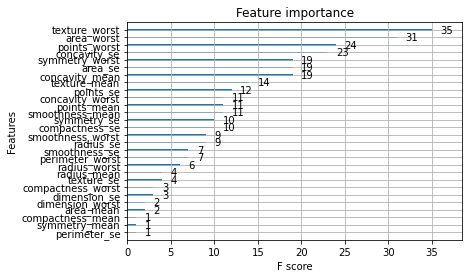

In [56]:
xgb.plot_importance(xgb_clf)

In [57]:
xgb_clf = xgb.XGBClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 42)

In [58]:
param_test1 = {'max_depth': range(3,10,2), 'gamma': [0.1, 0.2, 0.3],
               'subsample': [0.8, 0.9], 'colsample_bytree': [0.8, 0,9],
               'rag_alpha': [1e-2, 0.1, 1]}

### Grid Search:

In [59]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(xgb_clf, param_test1, n_jobs = -1, cv = 5, scoring = 'accuracy')

In [60]:
grid_search.fit(x_train, y_train)

C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.95604396 0.95384615 0.95604396 0.95384615 0.95604396 0.95384615
 0.95384615 0.95824176 0.95384615 0.95824176 0.95384615 0.95824176
 0.95384615 0.95824176 0.95384615 0.95824176 0.95384615 0.95824176
 0.95384615 0.95824176 0.95384615 0.95824176 0.95384615 0.95824176
 0.95384615 0.95824176 0.95384615 0.95824176 0.95384615 0.95824176
 0.95384615 0.95604396 0.95384615 0.95604396 0.95384615 0.95604396
 0.95384615 0.95604396 0.95384615 0.95604396 0.95384615 0.95604396
 0.95384615 0.95604396 0.95384615 0.95604396 0.95384615 0.95604396
 0.95824176 0.95824176 0.95824176 0.95824176 0.95824176 0.95824176
 0.95384615 0.95824176 0.95384615 0.95824176 0.95384615 0.95824176
 0.95384615 0.96043956 0.95384615 0.96043956 0.95384615 0.96043956
 0.95384615 0.96043956 0.95384615 0.96043956 0.95384615 0.96043956
 0.94945055 0.95164835 0.94945055 0.95164835 

[02:37:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "rag_alpha" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:37:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=500, n_jobs=None,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [61]:
cv_xg_clf = grid_search.best_estimator_

In [62]:
# Evaluation on Testing Data with model with hyperparameter
accuracy_score(y_test, cv_xg_clf.predict(x_test))
grid_search.best_params_

C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


{'colsample_bytree': 0.8,
 'gamma': 0.3,
 'max_depth': 7,
 'rag_alpha': 0.01,
 'subsample': 0.9}

# Stacking:

In [63]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn import metrics
import numpy as np

In [64]:
base_learners = []

In [65]:
# KNN classifier model
knn = KNeighborsClassifier(n_neighbors=2)
base_learners.append(knn)

In [66]:
# Decision Tree Classifier model
dtr = DecisionTreeClassifier(max_depth=4, random_state=123456)
base_learners.append(dtr)

In [67]:
# Multi Layered Perceptron classifier
mlpc = MLPClassifier(hidden_layer_sizes =(100, ), solver='lbfgs', random_state=123456)
base_learners.append(mlpc)

In [68]:
# Meta model using Logistic Regression
meta_learner = LogisticRegression(solver='lbfgs')

#### Create the training meta data:

In [69]:
# Create variables to store meta data and the targets
meta_data = np.zeros((len(base_learners), len(x_train)))
meta_targets = np.zeros(len(x_train))

In [70]:
# Create the cross-validation folds
KF = KFold(n_splits = 5)
meta_index = 0

In [74]:
# Create the cross-validation folds
KF = KFold(n_splits = 5)
meta_index = 0
for train_indices, test_indices in KF.split(x_train):
    # Train each learner on the K-1 folds and create meta data for the Kth fold
    for i in range(len(base_learners)):
        learner = base_learners[i]

        learner.fit(x_train[train_indices], y_train[train_indices])
        predictions = learner.predict_proba(x_train[test_indices])[:,0]

        meta_data[i][meta_index:meta_index+len(test_indices)] = predictions

    meta_targets[meta_index:meta_index+len(test_indices)] = y_train[test_indices]
    meta_index += len(test_indices)

KeyError: "None of [Int64Index([ 91,  92,  93,  94,  95,  96,  97,  98,  99, 100,\n            ...\n            445, 446, 447, 448, 449, 450, 451, 452, 453, 454],\n           dtype='int64', length=364)] are in the [columns]"

# Voting:

## Hard Voting:

In [76]:
from sklearn import datasets, linear_model, svm, neighbors, naive_bayes
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [77]:
# Instantiate the learners (classifiers)
learner_1 = neighbors.KNeighborsClassifier(n_neighbors=5)
learner_2 = linear_model.Perceptron(tol=1e-2, random_state=0)
learner_3 = svm.SVC(gamma=0.001)

In [78]:
# Instantiate the voting classifier
voting = VotingClassifier([('KNN', learner_1),
                           ('Prc', learner_2),
                           ('SVM', learner_3)])

In [79]:
# Fit classifier with the training data
voting.fit(x_train, y_train)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier()),
                             ('Prc', Perceptron(tol=0.01)),
                             ('SVM', SVC(gamma=0.001))])

In [80]:
# Predict the most voted class
hard_predictions = voting.predict(x_test)

In [81]:
# Accuracy of hard voting
print('Hard Voting:', accuracy_score(y_test, hard_predictions))

Hard Voting: 0.9210526315789473


## Soft Voting:

In [82]:
# Instantiate the learners (classifiers)
learner_4 = neighbors.KNeighborsClassifier(n_neighbors = 5)
learner_5 = naive_bayes.GaussianNB()
learner_6 = svm.SVC(gamma = 0.001, probability = True)

In [83]:
# Instantiate the voting classifier
voting = VotingClassifier([('KNN', learner_4),
                           ('NB', learner_5),
                           ('SVM', learner_6)],
                            voting = 'soft')

In [84]:
# Fit classifier with the training data
voting.fit(x_train, y_train)
learner_4.fit(x_train, y_train)
learner_5.fit(x_train, y_train)
learner_6.fit(x_train, y_train)

SVC(gamma=0.001, probability=True)

In [85]:
# Predict the most probable class
soft_predictions = voting.predict(x_test)

In [86]:
# Get the base learner predictions
predictions_4 = learner_4.predict(x_test)
predictions_5 = learner_5.predict(x_test)
predictions_6 = learner_6.predict(x_test)

In [87]:
# Accuracies of base learners
print('L4:', accuracy_score(y_test, predictions_4))
print('L5:', accuracy_score(y_test, predictions_5))
print('L6:', accuracy_score(y_test, predictions_6))

L4: 0.9298245614035088
L5: 0.9210526315789473
L6: 0.9385964912280702


In [88]:
# Accuracy of Soft voting
print('Soft Voting:', accuracy_score(y_test, soft_predictions))

Soft Voting: 0.9385964912280702
